# Linear Regression From Scratch
In this notebook you will implement linear regression using the least squares method.

The notebook will guide you in the general steps. You may use only numpy, pandas, and matplotlib for this exercise.

#### Math Background
The task is to solve linear regression for the data set of ```x``` and ```y```. That is, fit a line y to the data such that ```y = a + bx + e```. Where a and b are coefficents and e is an error term.

We know that ```b = SUM ( xi - x_mean) * (yi - y_mean) / SUM (xi - x_mean)^2``` where ```xi```, and ```yi``` are the indivdual observations and ```x_mean```, ```y_mean``` are means of all ```xi``` and ```yi```.

So a reasonable solution then for a fit is ```a = y_mean - b * x_mean```.


#### Implementation Steps
1. Load the file ```reg_data.csv```
2. Display the data with a scatter plot. Write a markdown cell and comment on the structure of the data and what kind of line you think will fit the data. 
3. Implement a function of the least squares method.
4. Plot the predictions from your function.
5. Comment on the output of your function. Does it make sense? Can it be made better? If yes, how?

In [24]:
#import the minimum packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [25]:
#load and inspect the data
# YOUR CODE HERE
df = pd.read_csv('reg_data.csv')
df


,X,Y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
...,...,...
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958


In [26]:
assert df.shape == (100,2)

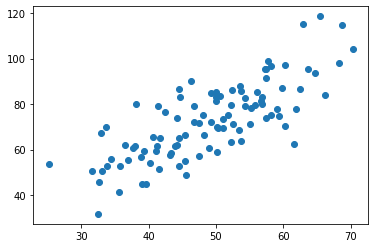

In [27]:
#plot the data (scatter)
# YOUR CODE HERE
plt.scatter(df['X'], df['Y'])

#It will be a line function - y = mx + b - with a positive slope

In [70]:
# YOUR CODE HERE
x_train, x_test, y_train, y_test = train_test_split(df['X'], df['Y'], test_size=0.2, random_state=0)
x_train

43    43.870613
62    52.378446
3     47.475640
71    53.660932
45    32.669044
        ...    
96    49.239765
67    57.362052
64    33.644706
47    53.575078
44    62.997481
Name: X, Length: 80, dtype: float64

In [39]:
assert x_train.shape == (80,)
assert x_test.shape == (20,)
assert y_train.shape == (80,)
assert y_test.shape == (20,)

In [79]:
#implement a least squares function to find a, b

x_mean = 0
y_mean = 0
b_upper = 0
b_lower = 0
b = 0
a = 0


#a = y_mean - b * x_mean
# YOUR CODE HERE
x_mean = x_train.mean()
y_mean = y_train.mean()

data_train = pd.concat([x_train, y_train], axis=1)


#b = SUM ( xi - x_mean) * (yi - y_mean) / SUM (xi - x_mean)^2
for index, row in data_train.iterrows():
    b_upper += (row['X']-x_mean)*(row['Y']-y_mean)
    b_lower += (row['X']-x_mean)**2

b = b_upper / b_lower
a = y_mean - b*x_mean

print(b)
print(a)

1.3450919020620415
6.687439682550206


In [86]:
assert abs(a - 6.68) <=0.03
assert abs(b - 1.34) <=0.03

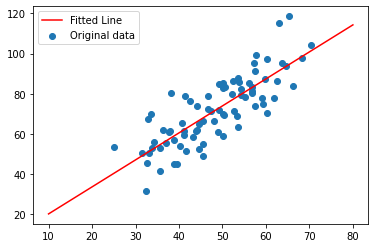

In [107]:
x = np.array([10, 80])
line = a + b*x
# YOUR CODE HERE
plt.scatter(data_train['X'], data_train['Y'], label='Original data')
plt.plot(x, line, 'r', label='Fitted Line')
plt.legend()

In [89]:
assert abs(a +3*b - 10.70) <= 0.05
assert abs(a +100*b - 140) <= 2

In [ ]:
# YOUR CODE HERE
# WE could make it better if we had a quadratic function but in this case we are doing a Linear Regression

In [101]:
#Separate your test data in to classes
#if the Y value for a certain X is lower than the line then the class is 0
class_0 = []
class_1 = []

# YOUR CODE HERE

#Create test data DF
data_test = pd.concat([x_test, y_test], axis=1)
#Loop over each row and add them to the right class
for i, (x, y) in enumerate(zip(x_test, y_test)):
    #Find the Y value for X in the DF
    line = a + b*x
    if(y<=line):
        class_0.append([x, y])
    else:
        class_1.append([x, y])
        

class_0 = np.array(class_0)
class_1 = np.array(class_1)
print(class_0.shape)
print(class_1.shape)
print(class_0)

(11, 2)
(9, 2)
[[51.0887199  69.58889785]
 [61.53035803 62.5623823 ]
 [55.0780959  71.13972786]
 [43.10782022 57.81251298]
 [51.08863468 73.43464155]
 [55.80573336 79.55043668]
 [58.16847072 75.39287043]
 [39.29956669 59.17148932]
 [52.22399609 63.35879032]
 [47.48120861 57.25181946]
 [51.84518691 75.38065167]]


In [102]:
assert 9 < class_0.shape[0] < 13
assert 7 < class_1.shape[0] < 11

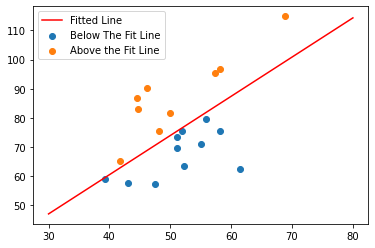

In [109]:
# YOUR CODE HERE
x = np.array([30, 80])
line = a + b*x

df_class0 = pd.DataFrame(class_0, columns = ['X', 'Y'])
df_class1 = pd.DataFrame(class_1, columns = ['X', 'Y'])
plt.scatter(df_class0['X'], df_class0['Y'], label='Below The Fit Line')
plt.scatter(df_class1['X'], df_class1['Y'], label='Above the Fit Line')
plt.plot(x, line, 'r', label='Fitted Line')
plt.legend()


In [113]:
def y_fit_line(x):
    return a + b*x

In [115]:
# get the total error for the classes
#y = a + bx + e
err = 0
# YOUR CODE HERE
total_test_rows = len(data_test)
total_dif_dist = 0
for i, (x, y) in enumerate(zip(x_test, y_test)):
    y_line_val = y_fit_line(x)
    total_dif_dist += abs(y_line_val - y)

err = total_dif_dist / total_test_rows

print(err)

10.091223930321695


In [116]:
assert err - 201 < 20